In [5]:
import numpy as np
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import datetime

from pprint import pprint
#from config import api_key
from matplotlib.pyplot import figure

#url = "http://www.omdbapi.com/?t="
#api_key = "&apikey=" + api_key
    
# Make request and store response
#response = requests.get(url + api_key)

# Reading in the CSV's
marvel_movies_df= pd.read_csv('mcu_domestic_global_box_office_fixed_endgame.csv')
iron_vs_cap_df= pd.read_csv('rdj ce movie data.csv')


marvel_movies_df = marvel_movies_df.sort_index(axis=1 ,ascending=True)

marvel_movies_df = marvel_movies_df.iloc[::-1]

marvel_movies_df
#marvel_movies_df
#marvel_movies_df.reindex(index=marvel_movies_df.index[::-1])

#marvel_movies_df['Release date']

#marvel_movies_df.sort_values(by=['Release date'])

,Domestic box office,Opening weekend,Production Budget,Release date,Title,Worldwide box office,origin,sequel,teamup
21,"$318,604,126","$102,118,668","$186,000,000.00",5/2/08,Iron Man,"$585,171,547",yes,no,no
20,"$134,806,913","$55,414,050","$137,500,000.00",6/13/08,The Incredible Hulk,"$265,573,859",yes,no,no
19,"$312,433,331","$128,122,480","$170,000,000.00",5/7/10,Iron Man 2,"$621,156,389",no,yes,no
18,"$181,030,624","$65,723,338","$150,000,000.00",5/6/11,Thor,"$449,326,618",yes,no,no
17,"$176,654,505","$65,058,524","$140,000,000.00",7/22/11,Captain America: The First Avenger,"$370,569,776",yes,no,no
16,"$623,357,910","$207,438,708","$225,000,000.00",5/4/12,The Avengers,"$1,515,100,211",no,no,yes
15,"$408,992,272","$174,144,585","$200,000,000.00",5/3/13,Iron Man 3,"$1,215,392,272",no,yes,no
14,"$206,362,140","$85,737,841","$150,000,000.00",11/8/13,Thor: The Dark World,"$644,602,516",no,yes,no
13,"$259,746,958","$95,023,721","$170,000,000.00",4/4/14,Captain America: The Winter Soldier,"$714,401,889",no,yes,no
12,"$333,714,112","$94,320,883","$170,000,000.00",8/1/14,Guardians of the Galaxy,"$770,882,395",yes,no,yes


In [6]:
marvel_movies_df['Domestic box office']= marvel_movies_df['Domestic box office'].replace('[$,.]',"",regex=True).astype(float)
marvel_movies_df['Worldwide box office']= marvel_movies_df['Worldwide box office'].replace('[$,.]',"",regex=True).astype(float)
marvel_movies_df['Production Budget']= marvel_movies_df['Production Budget'].replace('[$,.]',"",regex=True).astype(float)
marvel_movies_df['Opening weekend']= marvel_movies_df['Opening weekend'].replace('[$,.]',"",regex=True).astype(float)

In [11]:
teamup_titles = marvel_movies_df.loc[marvel_movies_df['teamup'] == "yes"]['Title']
teamup_doms = marvel_movies_df.loc[marvel_movies_df['teamup'] == "yes"]['Domestic box office']
teamup_global = marvel_movies_df.loc[marvel_movies_df['teamup'] == "yes"]['Worldwide box office']

non_teamup_titles = marvel_movies_df.loc[marvel_movies_df['teamup'] == "no"]['Title']
non_teamup_doms = marvel_movies_df.loc[marvel_movies_df['teamup'] == "no"]['Domestic box office']
non_teamup_global = marvel_movies_df.loc[marvel_movies_df['teamup'] == "no"]['Worldwide box office']

<function matplotlib.pyplot.show(close=None, block=None)>

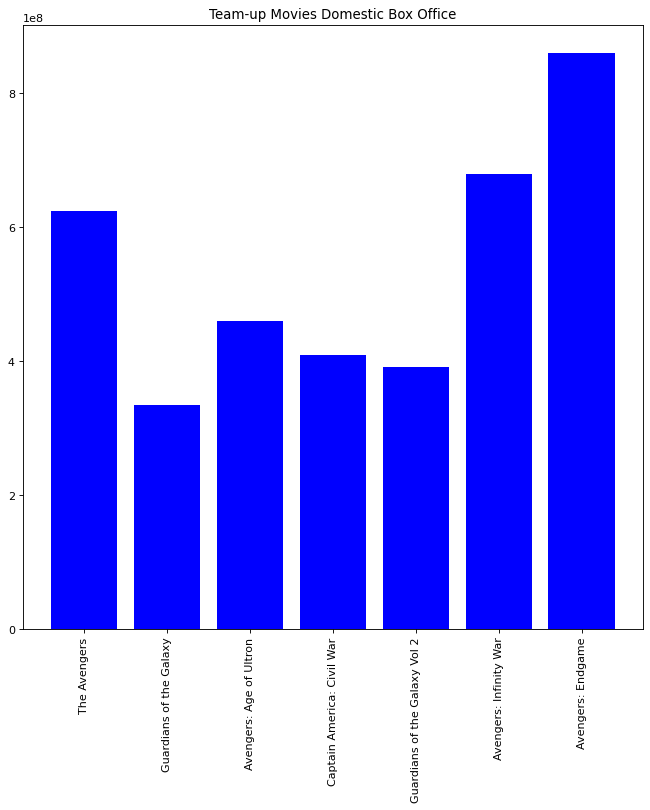

In [24]:
figure(figsize=(10, 10), dpi=80)

#plt.bar(marvel_movies_df['Title'], marvel_movies_df['Domestic box office'], color="b", align="center")
#plt.bar(marvel_movies_df.loc[marvel_movies_df['teamup'] == "yes"]['Title'], marvel_movies_df.loc[marvel_movies_df['teamup'] == "yes"]['Domestic box office'], color="b", align="center")
plt.bar(teamup_titles, teamup_doms, color="b", align="center")
plt.title("Team-up Movies Domestic Box Office")
plt.xticks(rotation=(90))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

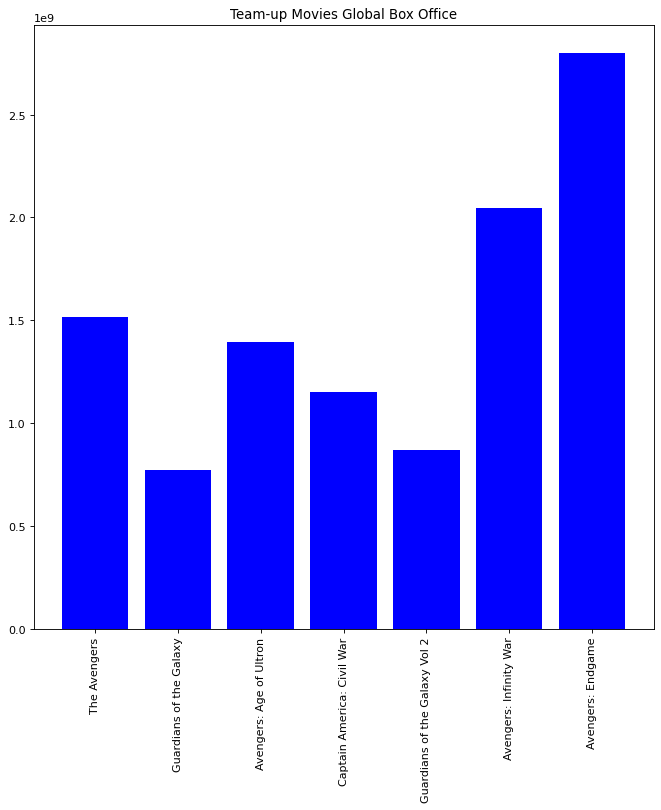

In [25]:
figure(figsize=(10, 10), dpi=80)

plt.bar(teamup_titles, teamup_global, color="b", align="center")
plt.title("Team-up Movies Global Box Office")
plt.xticks(rotation=(90))
plt.show

In [14]:
#avg_teamup_dom_gross = pd.series.mean(teamup_doms)

avg_teamup_dom_gross = teamup_doms.mean()
avg_teamup_dom_gross

535880546.0

In [15]:
avg_teamup_global_gross = teamup_global.mean()
avg_teamup_global_gross

1506339008.2857144

<function matplotlib.pyplot.show(close=None, block=None)>

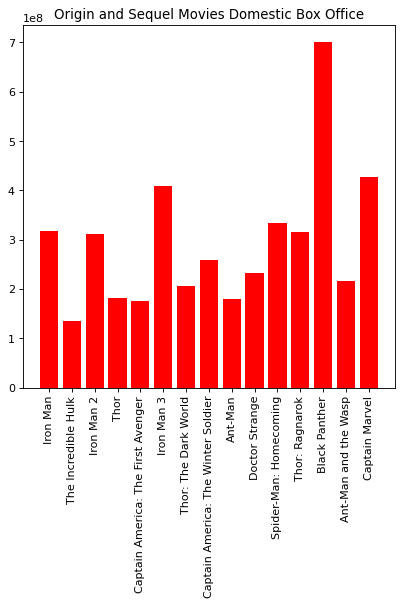

In [28]:
figure(figsize=(6, 6), dpi=80)

#plt.bar(marvel_movies_df['Title'], marvel_movies_df['Domestic box office'], color="b", align="center")
#plt.bar(marvel_movies_df.loc[marvel_movies_df['teamup'] == "yes"]['Title'], marvel_movies_df.loc[marvel_movies_df['teamup'] == "yes"]['Domestic box office'], color="b", align="center")

plt.bar(non_teamup_titles, non_teamup_doms, color="r", align="center")
plt.title("Origin and Sequel Movies Domestic Box Office")
plt.xticks(rotation=(90))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

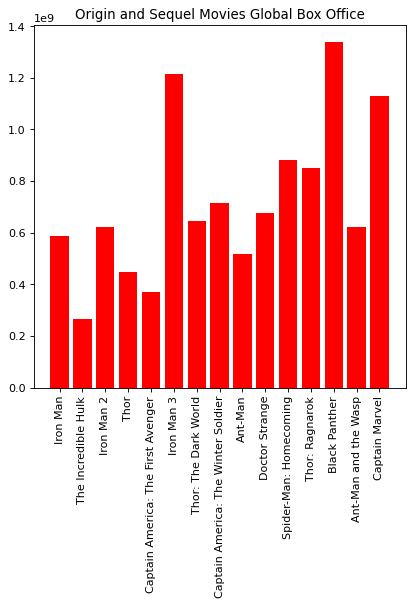

In [29]:
figure(figsize=(6, 6), dpi=80)

plt.bar(non_teamup_titles, non_teamup_global, color="r", align="center")
plt.title("Origin and Sequel Movies Global Box Office")
plt.xticks(rotation=(90))
plt.show

In [76]:
avg_nonteamup_dom_gross = non_teamup_doms.mean()
avg_nonteamup_dom_gross

293618168.4

In [18]:
avg_nonteamup_global_gross = non_teamup_global.mean()
avg_nonteamup_global_gross

725428219.5333333